## 모델의 성능 개선하기
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드하기
* 전처리된 모델을 로드하기

In [3]:
df = pd.read_csv("data/telco_feature.csv")
df.shape

(7043, 51)

In [4]:
# customerID 를 인덱스로 설정하기
df = df.set_index("customerID")

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,0,True,False,False,True,False,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5575-GNVDE,True,0,False,False,True,False,False,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,True,0,False,False,True,True,True,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7795-CFOCW,True,0,False,False,False,False,False,1,0,0,...,0,1,1,0,0,0,0,1,0,0
9237-HQITU,False,0,False,False,True,True,True,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## 전처리

In [7]:
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.
df = df.dropna()

In [9]:
df["Churn"].value_counts()

False    5174
True     1869
Name: Churn, dtype: int64

## 학습, 예측 데이터셋 나누기
### 학습, 예측에 사용할 컬럼

In [10]:
df.nunique()

gender                                     2
SeniorCitizen                              2
Partner                                    2
Dependents                                 2
PhoneService                               2
PaperlessBilling                           2
Churn                                      2
totalcharges_group_0-2k                    2
totalcharges_group_2k-4k                   2
totalcharges_group_4k-6k                   2
totalcharges_group_6kplus                  2
OnlineBackup_No                            2
OnlineBackup_No internet service           2
OnlineBackup_Yes                           2
Contract_Month-to-month                    2
Contract_One year                          2
Contract_Two year                          2
StreamingTV_No                             2
StreamingTV_No internet service            2
StreamingTV_Yes                            2
DeviceProtection_No                        2
DeviceProtection_No internet service       2
DeviceProt

In [11]:
df.columns.tolist().remove("Churn")

In [12]:
# 피처로 사용할 컬럼 지정하기
# feature_names = ["tenure", "MonthlyCharges", "TotalCharges"]
feature_names = df.columns.tolist()
feature_names.remove("Churn")
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'totalcharges_group_0-2k',
 'totalcharges_group_2k-4k',
 'totalcharges_group_4k-6k',
 'totalcharges_group_6kplus',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'tenure_group_0-20',
 'tenure_group_20-40',
 'tenure_group_40-60',
 'tenure_group_60plus',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'O

### 정답값이자 예측해야 될 값

In [13]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Churn"
label_name

'Churn'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [14]:
# X, y를 만들어 줍니다.
X = df.drop(label_name, axis=1)
y = df[label_name]

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [15]:
# train_test_split 으로 데이터셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 49), (1409, 49), (5634,), (1409,))

In [17]:
X_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus
customerID,,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,False,0,False,True,True,False,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6035-RIIOM,False,0,False,False,True,True,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3797-VTIDR,True,0,True,False,False,True,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [18]:
X_test.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus
customerID,,,,,,,,,,,,,,,,,,,,,
1024-GUALD,False,0,True,False,False,True,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0484-JPBRU,True,0,False,False,True,True,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3620-EHIMZ,False,0,True,True,True,False,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [19]:
y_train.head(2)

customerID
4223-BKEOR    False
6035-RIIOM    False
Name: Churn, dtype: bool

## 여러개의 머신러닝 모델로 성능 비교하기

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            ]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [21]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([11, 18, 10, 10,  8,  2, 18,  5,  2,  3])

In [22]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.49592346, 0.85405886, 0.67264651, 0.4490611 , 0.66561272,
       0.91403871, 0.41666475, 0.87103641, 0.91876906, 0.4816114 ])

In [23]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [24]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=10,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


In [28]:
df_result = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df_result

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7613495153246995, 'max_dept...",0.788072,0.802697,"{'mean_fit_time': [0.07343616485595703, 0.0401..."
1,RandomForestClassifier,"{'n_estimators': 143, 'max_features': 0.887330...",0.792688,0.814762,"{'mean_fit_time': [3.0198354721069336, 2.31851..."
2,GradientBoostingClassifier,"{'n_estimators': 130, 'max_features': 0.916520...",0.776002,0.792761,"{'mean_fit_time': [10.959122705459595, 13.3410..."


In [31]:
pd.DataFrame(df_result.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.674146,0.022401,0.051539,0.003611,143,0.88733,5,"{'n_estimators': 143, 'max_features': 0.887330...",0.808341,0.802130,0.770186,0.787933,0.794849,0.792688,0.013174,1
1,2.318511,0.285656,0.079648,0.036076,139,0.777699,5,"{'n_estimators': 139, 'max_features': 0.777699...",0.806566,0.803904,0.769299,0.785271,0.796625,0.792333,0.013677,2
3,2.213580,0.261897,0.068028,0.004575,186,0.76135,5,"{'n_estimators': 186, 'max_features': 0.761349...",0.807453,0.803904,0.770186,0.784383,0.793961,0.791978,0.013551,3
7,0.751989,0.046298,0.032609,0.001561,101,0.58126,3,"{'n_estimators': 101, 'max_features': 0.581259...",0.796806,0.795918,0.771074,0.779947,0.786856,0.786120,0.009749,4
2,3.357595,0.617950,0.083492,0.031915,143,0.76135,10,"{'n_estimators': 143, 'max_features': 0.761349...",0.782609,0.785271,0.772848,0.780834,0.785968,0.781506,0.004705,5
9,2.556403,0.565844,0.062748,0.016771,160,0.88733,12,"{'n_estimators': 160, 'max_features': 0.887330...",0.779059,0.773736,0.755102,0.767524,0.772647,0.769614,0.008129,6
8,2.736171,0.053859,0.067396,0.005478,136,0.999485,12,"{'n_estimators': 136, 'max_features': 0.999484...",0.773736,0.768412,0.758651,0.769299,0.774423,0.768904,0.005645,7
0,3.019835,0.191678,0.103214,0.064883,139,0.76135,15,"{'n_estimators': 139, 'max_features': 0.761349...",0.771074,0.766637,0.755102,0.767524,0.757549,0.763577,0.006153,8
5,4.458190,0.648021,0.097690,0.024600,173,0.971658,15,"{'n_estimators': 173, 'max_features': 0.971657...",0.768412,0.757764,0.755989,0.769299,0.758437,0.761980,0.005677,9
4,4.262308,0.187890,0.088069,0.021039,139,0.88733,17,"{'n_estimators': 139, 'max_features': 0.887330...",0.765750,0.759539,0.758651,0.765750,0.759325,0.761803,0.003236,10


In [34]:
df_result

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7613495153246995, 'max_dept...",0.788072,0.802697,"{'mean_fit_time': [0.07343616485595703, 0.0401..."
1,RandomForestClassifier,"{'n_estimators': 143, 'max_features': 0.887330...",0.792688,0.814762,"{'mean_fit_time': [3.0198354721069336, 2.31851..."
2,GradientBoostingClassifier,"{'n_estimators': 130, 'max_features': 0.916520...",0.776002,0.792761,"{'mean_fit_time': [10.959122705459595, 13.3410..."


In [38]:
best_params = df_result.loc[1, "best_params"]
best_params

{'n_estimators': 143, 'max_features': 0.8873303376641575, 'max_depth': 5}

In [45]:
model = RandomForestClassifier(n_estimators=best_params["n_estimators"], 
                               max_features=best_params["max_features"], 
                               max_depth=best_params["max_depth"], 
                               random_state=42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5,
                       max_features=0.8873303376641575, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=143, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [46]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5,
                       max_features=0.8873303376641575, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=143, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(X_test)

## 모델 평가하기

In [51]:
# 피처의 중요도를 추출하기

importances = pd.DataFrame({"importances" : model.feature_importances_, 
              "feature_names" :feature_names})
importances = importances.sort_values("importances", ascending=False).head(10)

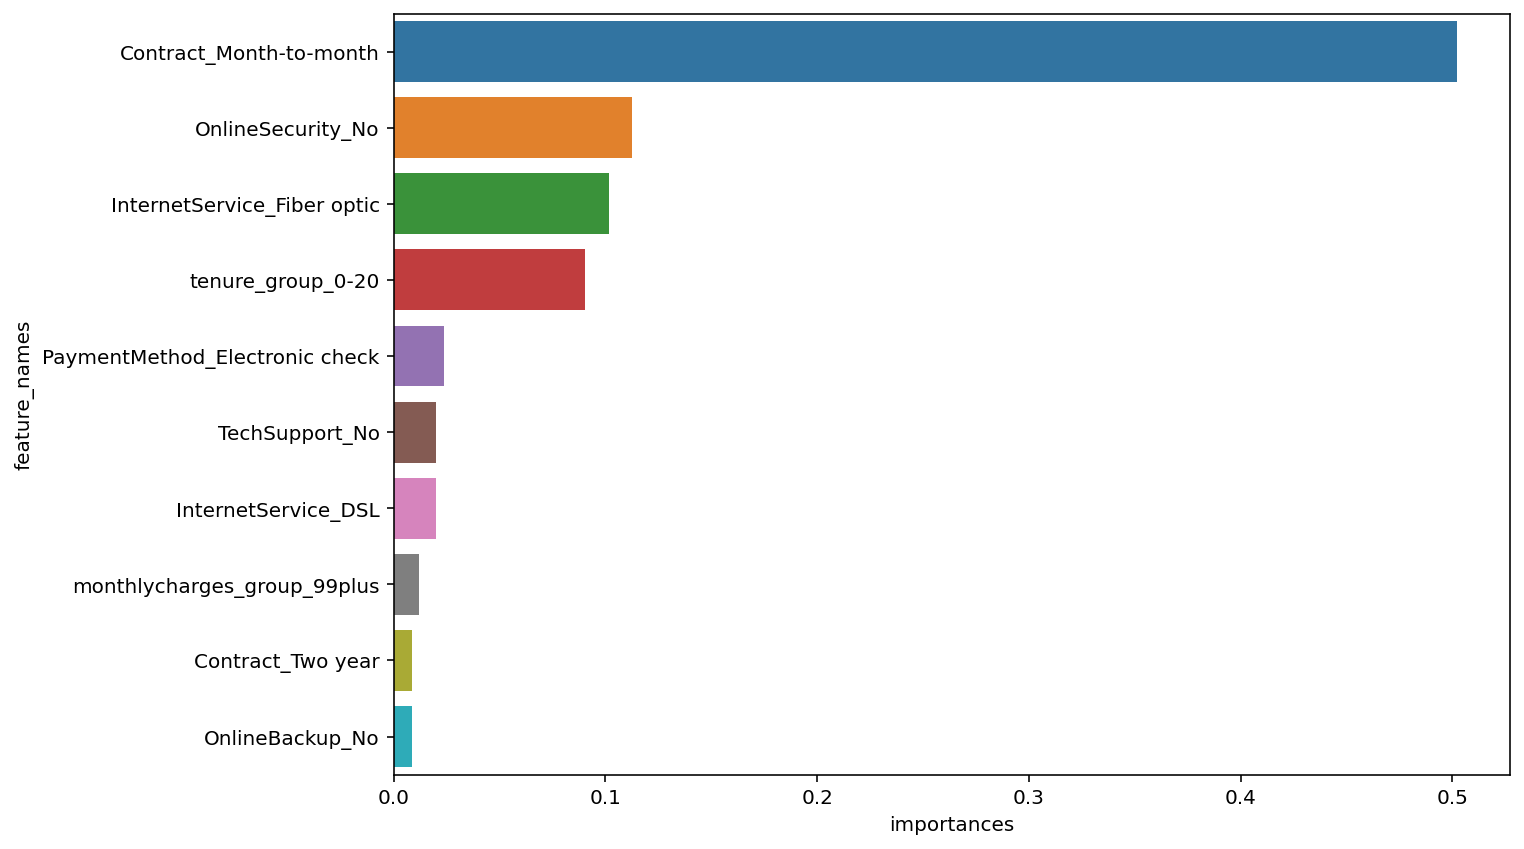

In [54]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(10, 7))
sns.barplot(data=importances, x="importances", y="feature_names")

### 점수 측정하기
#### Accuracy

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8147622427253371

In [58]:
(y_test == y_pred).mean()

0.8147622427253371

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

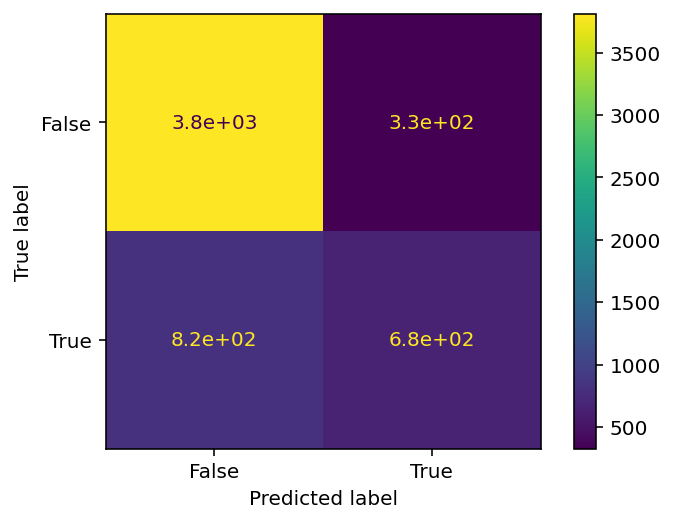

In [59]:
# plot_confusion_matrix 를 그립니다.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

In [61]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.84      0.93      0.88      1036
        True       0.72      0.50      0.59       373

    accuracy                           0.81      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

